In [1]:
import numpy as np
import math

In [27]:
import numpy as np

def f(x, y):
    """Example convex function: f(x) = x^2"""
    # return 5*x**2 + 3*x +4
    return x**2 + y**2

def df(x, y):
    """Derivative of the example function: df(x) = 2x"""
    # return 10*x + 3
    dfx= 2*x  # partial derivative w.r.t.x
    dfy= 2*y  # partial derivative w.r.t.y
    return dfx, dfy

def gradient_descent(f, df, starting_point, learning_rate, epochs, tolerance=1e-6):
    """
    Performs Gradient Descent optimization with convergence check.
    
    Parameters:
    - f: The function to minimize.
    - df: The derivative of the function.
    - starting_point: Initial value of x.
    - learning_rate: Step size for each iteration.
    - epochs: Maximum number of iterations.
    - tolerance: Threshold for convergence check.
    
    Returns:
    - x: The optimized value of x.
    """
    x, y = starting_point
    for i in range(epochs):
        prev_f_value = f(x,y)
        grad_x, grad_y= df(x,y)
        x = x - learning_rate * grad_x
        y = y - learning_rate * grad_y
        print(f"Iteration {i+1}, x = {x}, y= {y},  f(x) = {f(x, y)}")
        current_f_value = f(x, y)
        
        # Check for convergence
        if abs(current_f_value - prev_f_value) < tolerance:
            print(f"Converged after {i+1} iterations.")
            return x, y
    
    print("Reached maximum iterations without convergence.")
    return x, y

# Optimization parameters
starting_point = 100,12
learning_rate = 0.01
epochs = 1000

# Perform Gradient Descent with convergence check
optimized_x, optimized_y = gradient_descent(f, df, starting_point, learning_rate, epochs)
print(f"Optimized x: {optimized_x}")
print(f"Optimized y: {optimized_y}")


Iteration 1, x = 98.0, y= 11.76,  f(x) = 9742.2976
Iteration 2, x = 96.04, y= 11.524799999999999,  f(x) = 9356.50261504
Iteration 3, x = 94.1192, y= 11.294303999999999,  f(x) = 8985.985111484419
Iteration 4, x = 92.236816, y= 11.068417919999998,  f(x) = 8630.140101069634
Iteration 5, x = 90.39207968000001, y= 10.847049561599999,  f(x) = 8288.386553067277
Iteration 6, x = 88.5842380864, y= 10.630108570367998,  f(x) = 7960.166445565813
Iteration 7, x = 86.81255332467201, y= 10.417506398960638,  f(x) = 7644.943854321407
Iteration 8, x = 85.07630225817857, y= 10.209156270981426,  f(x) = 7342.20407769028
Iteration 9, x = 83.374776213015, y= 10.004973145561797,  f(x) = 7051.452796213744
Iteration 10, x = 81.7072806887547, y= 9.80487368265056,  f(x) = 6772.21526548368
Iteration 11, x = 80.0731350749796, y= 9.608776208997549,  f(x) = 6504.035540970526
Iteration 12, x = 78.47167237348002, y= 9.416600684817597,  f(x) = 6246.4757335480945
Iteration 13, x = 76.90223892601041, y= 9.228268671121246,

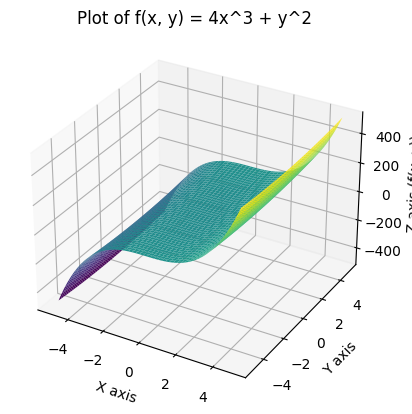

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = 4*x**3 + y**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis (f(x, y))')
ax.set_title('Plot of f(x, y) = 4x^3 + y^2')

plt.show()


### Implementing Gradient Descent on RMSE function

In [35]:
def mse(y, y_hat):
    """Calculate Mean Squared Error."""
    return np.mean((y - y_hat) ** 2)

def gradients(X, y, w, b):
    """Calculate gradients of MSE with respect to w and b."""
    y_hat = w * X + b
    dw = -2 * np.mean(X * (y - y_hat))
    db = -2 * np.mean(y - y_hat)
    return dw, db

def gradient_descent(X, y, w_init, b_init, learning_rate, epochs):
    """Perform gradient descent optimization to minimize MSE."""
    w, b = w_init, b_init
    rmse_history= []
    for i in range(epochs):
        dw, db = gradients(X, y, w, b)
        w -= learning_rate * dw
        b -= learning_rate * db
        if i % 100 == 0:  # Print MSE every 100 iterations
            print(f"Epoch {i}, MSE: {mse(y, w * X + b)}")
    return w, b

# Example data
X = np.array([1, 20, 3, 4, 5])  # Input features
y = np.array([2, 4, 6, 8, 10])  # Actual values

# Optimization parameters
w_init, b_init = 0.0, 0.0  # Initial values for weight and bias
learning_rate = 0.01
epochs = 1000

# Run gradient descent
w_opt, b_opt = gradient_descent(X, y, w_init, b_init, learning_rate, epochs)
print(f"Optimized weight: {w_opt}, Optimized bias: {b_opt}")

# # Visualization of RMSE convergence
# plt.plot(rmse_history)
# plt.title('RMSE Convergence')
# plt.xlabel('Epoch')
# plt.ylabel('RMSE')
# plt.show()


Epoch 0, MSE: 38.53370879999999
Epoch 100, MSE: 10.422911798691102
Epoch 200, MSE: 8.114598995352775
Epoch 300, MSE: 7.822701291289732
Epoch 400, MSE: 7.785789366045437
Epoch 500, MSE: 7.781121668402475
Epoch 600, MSE: 7.780531414679812
Epoch 700, MSE: 7.780456774143137
Epoch 800, MSE: 7.780447335473795
Epoch 900, MSE: 7.780446141906829
Optimized weight: -0.06859535036171671, Optimized bias: 6.452622494453617
